We would like to work with a prediction / classification problem. We are interested in seeing which font color to use on different background colors (in RGB values).

Say we choose a specific color like this one, we would like to make a model which can predict which font type is best suited for it in regards to it's luminence (we are only working with white or black font).

![alt text](https://i.imgur.com/JG2DfkA.png)

There is a formula for solving this problem. The correct font color for the background is decided by how bright the background color is and if background color luminance > 0.5 then you should choose a dark font and of course if the background color luminance < 0.5 you should choose a white font. 
This formula can be found on StackOverflow: https://stackoverflow.com/questions/1855884/determine-font-color-based-on-background-color#1855903

![Formel](https://i.imgur.com/IHgj5A9.png)

But what if we didn't have this formula, or it simply hasn't been discovered yet? In that case, a neural network can help us. We therefore try to make a model, which can solve this prediction problem for us using a neural network. 

![alt text](https://i.imgur.com/XDs6kM6.png)

Credits for idea and illustrations go to: Thomas Nield (Youtube: https://www.youtube.com/watch?v=tAioWlhKA90)



In [1]:
#First we imported the needed libraries
import pandas as pd
import numpy as np

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


Here, we download our training dataset.

In [2]:
# Download the color training dataset
!wget https://raw.githubusercontent.com/thomasnield/kotlin_simple_neural_network/master/src/main/resources/color_training_set.csv

--2018-11-08 19:10:56--  https://raw.githubusercontent.com/thomasnield/kotlin_simple_neural_network/master/src/main/resources/color_training_set.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.84.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.84.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14822 (14K) [text/plain]
Saving to: ‘color_training_set.csv.1’

color_training_set. 100%[===================>]  14.47K  --.-KB/s    in 0.02s   

2018-11-08 19:10:57 (754 KB/s) - ‘color_training_set.csv.1’ saved [14822/14822]



In [3]:
predictors = pd.read_csv('color_training_set.csv')
predictors.columns = ['r', 'g', 'b']

In [4]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 3 columns):
r    1344 non-null int64
g    1344 non-null int64
b    1344 non-null int64
dtypes: int64(3)
memory usage: 31.6 KB


As can be seen, the training dataset consists of 1344 different background colors in RGB values. We will use these to train our model.

Next up, we define a function to calculate the optimal font color using the formula we described before. This will be used to classify which font color is optimal for each of our 1344 background colors.
Of course, this is a bit of a cheat since we supposedly haven't discovered this formula yet, but the equivalent would be to manually classify each background color by hand. We simply do this to save time, yay for being lazy! 😏

In [5]:
# Predict the optimal shade using the formula. This function takes a list as its input.
def FormulaicPredict(color):
  r = color[0]
  g = color[1]
  b = color[2]
  d = 0
  l = 0
  
  luminance = (0.299 * r + 0.587 * g + 0.114 * b)/255
  
  if luminance > 0.5:
    d = 1 # bright background, black font
    l = 0
  else:
    d = 0 # dark background, white font
    l = 1
    
  return pd.Series([d,l])



We will now apply the above formula to each row in our training dataset. With this, we create a new DataFrame with the predictions for each background color.

In [6]:
target = predictors.apply(FormulaicPredict, axis=1)
target.columns = ['dark', 'light']

In [7]:
target.head()

,dark,light
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We start building the architecture for our model, first we set up our model with the Sequential() function.

We add our first layer using 3 nodes, using the 'relu' activation which is one of the most commonly used activation functions.

![alt text](https://i.imgur.com/6xZdwAk.png)

Here is a picture of some of the other activation functions just to give a understanding of how they work.







![alt text](https://i.imgur.com/wz34AGD.png)

Here we see a picture of how the idea of our different layers of the model should work with the relu activation function, we take our nodes value and they are multiplied by the weights and added in the next layer and then again multiplied and added for a sum. This should give the network the value to predict which font color to use based on which background color it see's. These weights can change over time as the model get's more information.

In [41]:
np.random.seed(10) # Set to 10 for a good result, 8 for a worse one

model = Sequential()
model.add(Dense(3, activation='relu', input_dim=3))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=3)

# Fit the model
history = model.fit(predictors, target, validation_split=0.3, epochs=250, callbacks=[early_stopping_monitor])

Train on 940 samples, validate on 404 samples
Epoch 1/250
940/940 [==============================] - 1s 1ms/step - loss: 4.5330 - acc: 0.6426 - val_loss: 6.7500 - val_acc: 0.4765
Epoch 2/250
940/940 [==============================] - 0s 113us/step - loss: 4.3814 - acc: 0.6457 - val_loss: 6.6714 - val_acc: 0.4839
Epoch 3/250
940/940 [==============================] - 0s 105us/step - loss: 4.2654 - acc: 0.6559 - val_loss: 6.4793 - val_acc: 0.4839
Epoch 4/250
940/940 [==============================] - 0s 112us/step - loss: 4.1189 - acc: 0.6601 - val_loss: 6.3303 - val_acc: 0.5025
Epoch 5/250
940/940 [==============================] - 0s 112us/step - loss: 3.8509 - acc: 0.6691 - val_loss: 5.8037 - val_acc: 0.5606
Epoch 6/250
940/940 [==============================] - 0s 122us/step - loss: 3.5112 - acc: 0.7112 - val_loss: 5.4714 - val_acc: 0.5557
Epoch 7/250
940/940 [==============================] - 0s 117us/step - loss: 3.4122 - acc: 0.7165 - val_loss: 5.2389 - val_acc: 0.5668
Epoch 8/250

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 8         
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


Let's plot the results of our trained model. Here we plot the accuracy and loss over time.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

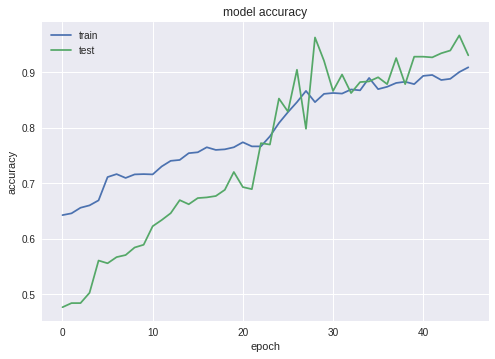

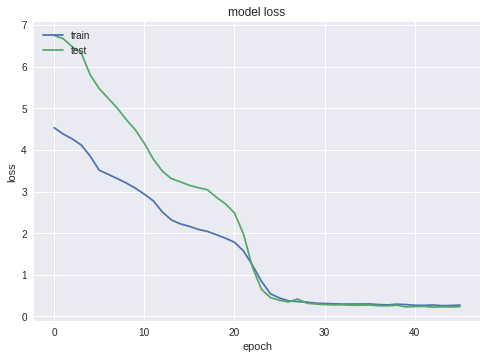

In [42]:
plt.style.use('seaborn')

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

There is room for optimizing the model, where you can think about different things. 
How many layers are needed, how many nodes are needed in every layer and which activation function should you use.
You can also tweek the model on learning rate and how to measure for error.

Let's quickly try predicting with a black background color.

In [12]:
bgcolor = pd.DataFrame([[0,0,0]])
prediction = model.predict(bgcolor)
prediction

array([[ 0.63665843,  0.37152308]], dtype=float32)

The left value is dark, the right value is light. Ideally, the preferred font color would be 1, but it would require a lot of optimization to reach that, as that would be a perfectly trained model. To evaluate which font color we should go with, we simply check which of these values is the highest instead.

## Interactive prediction

The following code won't run without Jupyter Notebook since we use some features specific to that.

In [13]:
from IPython.core.display import display, HTML

def predictColor(r, g, b):
  bgcolor = pd.DataFrame([[r,g,b]])
  bgcolor_hex = '#%02x%02x%02x' % (r, g, b)
  black = '#000'
  white = '#fff'
  fontcolor = ''
  prediction = model.predict(bgcolor)
  
  if prediction[0][0] > prediction[0][1]:
    fontcolor = black
  else:
    fontcolor = white
    
  display(HTML('<div style="background-color:{0}; color:{1};">SOME TEXT</div>'.format(bgcolor_hex, fontcolor)))

In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

colorpicker = widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)
display(colorpicker)

out = widgets.Output()
display(out)

@out.capture()
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        h = colorpicker.value
        rgb = tuple(int(h.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))
        predictColor(rgb[0], rgb[1], rgb[2])
    
colorpicker.observe(on_change)

ColorPicker(value='blue', description='Pick a color')

Output()